<h1>This notebook belongs to Liviu Petre and will be used for the capstone project for the "IBM Data Science Professional" specialization. Looking forward to it!</h1>

<h2 style="color:red">Beginning of question 1</h2>

In [1]:
#first import the needed libraries; only panda for now
import pandas as pd

<h3>In order to read the table, I will use the read_html method, and identify the first wikitable</h3>

In [2]:
url = 'http://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df = pd.read_html(url, attrs={"class": "wikitable"})[0] # 0 is for the 1st table in this particular page
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


<br>
<h3>We will start now cleaning the data frame as specified. First, drop the lines where Boroughs are Not assigned</h3>

In [3]:
#clean up Borough = Not assigned
df.drop(df[df.Borough == "Not assigned"].index, inplace=True)
df.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


<br>
<h3>According to instructions: "If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.". We will check if there is any such case</h3>

In [4]:
# check any Not assigned  neighborhood
df[df.Neighbourhood == "Not assigned"]

,Postal Code,Borough,Neighbourhood


<h4>No such case exists!</h4>

<br>
<h3>Next we will check if more than one neighborhood can exist in one postal code area. For this we will first group by postal code and see how many rows we have and compare to the original data frame</h3>

In [5]:
#check if more than one neighborhood can exist in one postal code area
df[['Postal Code','Borough']].groupby(['Postal Code']).agg('count')

,Borough
Postal Code,
M1B,1
M1C,1
M1E,1
M1G,1
M1H,1
...,...
M9N,1
M9P,1
M9R,1


<h4>Grouping by postal code gives 103 rows. Let's now check the number of lines in the original data frame:</h4>

In [6]:
#check number of rows in data frame
df.shape

(103, 3)

<h4>So we have the same number of rows as in the grouping above, 103. This means each postal code appears once, so, as you can see from the wikipedia page, the neighbourhoods area already joined in the same boroughs.</h4>

<br>
<h3>We now reset the index and rename the columns exactly as the exercise requires </h3>

In [7]:
df.reset_index(drop=True, inplace=True)
df.columns=["PostalCode","Borough","Neighborhood"]
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


<br>
<h3>And last, we call the shape method</h3> 

In [8]:
df.shape

(103, 3)

<h2 style="color:red">End of question 1</h2>

***

<h2 style="color:red">Beginning of question 2</h2>

<h3>First I tried using the geocoder library</h3>

In [10]:
#first install the package
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [11]:
#then import the pacakge
import geocoder

<br>
<h3>Now initiate the 2 additional columns of the data frame with float values</h3>

In [9]:
df['Latitude'] = len(df['PostalCode'])*[0.000000]
df['Longitude'] = len(df['PostalCode'])*[0.000000]
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,0.0,0.0
1,M4A,North York,Victoria Village,0.0,0.0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",0.0,0.0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",0.0,0.0
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",0.0,0.0
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",0.0,0.0
99,M4Y,Downtown Toronto,Church and Wellesley,0.0,0.0
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",0.0,0.0
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",0.0,0.0


<br>
<h3>Now we will iterate through each postal code, and for each, try to use geocoder to obtain the coordinates, then set them in the data frame</h3>

In [31]:
# iterate through the postal codes
for postal_code in df['PostalCode']:
    lat_lng_coords = None
    # loop until you get the coordinates
    while((lat_lng_coords is None)):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    # set latitude and longitude
    df.at[df.loc[df['PostalCode']==postal_code].index.tolist()[0],'Latitude'] = lat_lng_coords[0]
    df.at[df.loc[df['PostalCode']==postal_code].index.tolist()[0],'Longitude'] = lat_lng_coords[1]

KeyboardInterrupt: 

<h4 style="color:red">Unfortunately this did not work, as the geocoder library does not function properly, so I had to stop it</h4>

<br>
<h3> So, now, I will use the excel provided in the course. First I will import it in another data frame </h3>

In [10]:
url="http://cocl.us/Geospatial_data"
dfLatLong=pd.read_csv(url)

In [11]:
dfLatLong.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


<br>
<h3>Now, for each postal code, set the value in the initial data frame using the "at" method</h3>

In [12]:
for postal_code in df['PostalCode']:
    df.at[df.loc[df['PostalCode']==postal_code].index.tolist()[0],'Latitude'] = dfLatLong.at[dfLatLong.loc[dfLatLong['Postal Code']==postal_code].index.tolist()[0],'Latitude']
    df.at[df.loc[df['PostalCode']==postal_code].index.tolist()[0],'Longitude'] = dfLatLong.at[dfLatLong.loc[dfLatLong['Postal Code']==postal_code].index.tolist()[0],'Longitude']

<br>
<h3>Now the display the complete data frame</h3>

In [13]:
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


<h2 style="color:red">End of question 2</h2>

***

<h2 style="color:red">Beginning of question 3</h2>

<h3>We start by selecting only the boroughs that contain Toronto</h3>

In [14]:
toronto_data = df[df['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


<br>
<h3>We now install the needed packages</h3>

In [55]:
pip install geopy 

Note: you may need to restart the kernel to use updated packages.


In [56]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [57]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [70]:
import folium #kibrary for map drawing
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans #library used for k-means clustering

# Matplotlib and associated plotting modules
import matplotlib.cm as cm 
import matplotlib.colors as colors

# pyplot will be used to determine the best K using the elbow method
import matplotlib.pyplot as plt

<br>
<h3>Now we find the coordinates of Toronto and then create the map of Toronto with neighborhoods superimposed on top</h3>

In [19]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [20]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<br>
<h3>We now will use the foursquare api in order to get for each neighbourhood in toronto, the list of top 100 venues within a radius of 500 metres</h3>

In [21]:
#first set up the params for the foursquare api
CLIENT_ID = 'LWIHPTLIJLT1KPIBOOGSD35VLGFELRJA5EWFY4P1IFHUEMH5' # your Foursquare ID
CLIENT_SECRET = 'SG3IT1D1NJPMBMZM5WOCQPINARAGPYPXBGHPCEAO2PK00UPV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value to limit the number of venues 

In [66]:
#create a fuction that iterates through the list of neighborhoods, latitudes and longitudes and returns the top 100 venues

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name + ";" +  str(lat) + ";" + str(lng))
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<h4>Now call the function using the toronto_data - the function prints each neighborhood with its latitude and logitude</h4>

In [67]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Regent Park, Harbourfront;43.6542599;-79.3606359
Queen's Park, Ontario Provincial Government;43.6623015;-79.3894938
Garden District, Ryerson;43.6571618;-79.37893709999999
St. James Town;43.6514939;-79.3754179
The Beaches;43.67635739999999;-79.2930312
Berczy Park;43.644770799999996;-79.3733064
Central Bay Street;43.6579524;-79.3873826
Christie;43.669542;-79.4225637
Richmond, Adelaide, King;43.65057120000001;-79.3845675
Dufferin, Dovercourt Village;43.66900510000001;-79.4422593
Harbourfront East, Union Station, Toronto Islands;43.6408157;-79.38175229999999
Little Portugal, Trinity;43.647926700000006;-79.4197497
The Danforth West, Riverdale;43.6795571;-79.352188
Toronto Dominion Centre, Design Exchange;43.6471768;-79.38157640000001
Brockton, Parkdale Village, Exhibition Place;43.6368472;-79.42819140000002
India Bazaar, The Beaches West;43.6689985;-79.31557159999998
Commerce Court, Victoria Hotel;43.6481985;-79.37981690000001
Studio District;43.6595255;-79.340923
Lawrence Park;43.7280205;-

<h4>Let's check the result</h4>

In [26]:
print(toronto_venues.shape)
toronto_venues.head()

(1605, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
1,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


<br>
<h3>We will now use the get_dummies method to have a column for each venue category. For each venue, there will be a line with a 1 on the respective category column</h3>

In [42]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
neighborhood_column = toronto_onehot.columns.get_loc("Neighborhood")
fixed_columns = [toronto_onehot.columns[neighborhood_column]] + list(toronto_onehot.columns[:neighborhood_column]) + list(toronto_onehot.columns[neighborhood_column+1:])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot


,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,"Business reply mail Processing Centre, South C...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1601,"Business reply mail Processing Centre, South C...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1602,"Business reply mail Processing Centre, South C...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1603,"Business reply mail Processing Centre, South C...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# check that the number of lines is the same as for toronto_venus
toronto_onehot.shape

(1605, 229)

<br>
<h3>We group by neighborhood and take the mean for each category to have normalized data (between 0 and 1) representing the frequency of that category within the top 100 list</h3>

In [46]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.038462
2,"Business reply mail Processing Centre, South C...",0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.0625,0.0625,0.0625,0.125,0.1875,0.125,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.00,0.016667,0.000000,0.000000,0.016667,0.016667
5,Christie,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.012658,0.000000,0.00,...,0.012658,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.025316
7,"Commerce Court, Victoria Hotel",0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.040000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000
8,Davisville,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.028571,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


<br>
<h3>And finally we will select the top 5 venues, based on the frequencies above, for each neighborhood</h3>

<h4>First create the function that returns the top venue categories</h4>

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False) #sort in descending order
    
    return row_categories_sorted.index.values[0:num_top_venues] #return first num_top_values

<h4>And now create an empty data frame with the columns: Neighborhood, 1st most common venue, 2nd most common venue etc.</h4>

In [107]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd'] #used to prefix the first columns

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

# iterate through each neighborhood and call the function to populate the data frame with the most common venue categories
for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Farmers Market,Beer Bar
1,"Brockton, Parkdale Village, Exhibition Place",Café,Bakery,Breakfast Spot,Coffee Shop,Yoga Studio
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Park,Auto Workshop,Brewery,Spa
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Airport,Harbor / Marina
4,Central Bay Street,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Salad Place


<br>
<h3> We are now ready for clustering !!! </h3>

<h4> We are going to calculate the sum of squared distance for various values of k and plot them </h4>

Text(0, 0.5, 'Sum of squared distance')

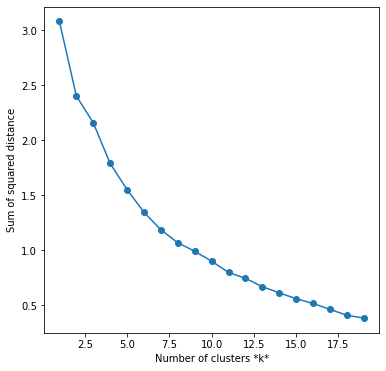

In [108]:


toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

list_k = list(range(1, 20))

sse = [] # list of sum of squared distance for each k

for k in list_k:
    
    #Train Model and calculate distance
    kmeans = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
    sse.append(kmeans.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

<h4>We will choose 7 as the best value of k; now let's run the alogorith again for 7 clusters </h4>

In [109]:
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1], dtype=int32)

<br>
<h3> Starting from the frame of neighborhoods, we now add the cluster label and the top venues list. We use neighborhood as join value </h3>

In [110]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Bakery,Pub,Park,Breakfast Spot
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,Coffee Shop,Sushi Restaurant,Creperie,Smoothie Shop,Sandwich Place
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Clothing Store,Coffee Shop,Hotel,Middle Eastern Restaurant,Japanese Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Café,Coffee Shop,Gastropub,Hotel,American Restaurant
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Trail,Health Food Store,Pub,Yoga Studio,Deli / Bodega


<br>
<h3> And to complete, we draw the map with the proper clusters </h3>

In [111]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h2 style="color:red">End of question 3</h2>